# K-Nearest Neighbors

### Objectives
* Use K Nearest Neighbors to classify data
* Load Customer data
* fit the data
* Use K-nearest neighbor to predict a data point

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data visualisation and analysis

In [3]:
# get the number of each class is in data
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

**Plus-Service** : `3` ---> 281

**Basic-service** : `1` ---> 266

**Total-Service** : `4` ----> 236

**E-Service customers** :`2` ---> 217

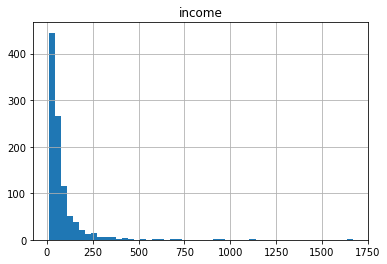

In [4]:
df.hist(column = 'income', bins = 50 );

**Feature Set**

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [7]:
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
y = df["custcat"].values

In [9]:
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Normalize Data
Data Standardization gives the data zero mean and unit variance, it is a good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [11]:
#Normalise
sds = StandardScaler()
X = sds.fit_transform(x, x.astype(float))

In [12]:
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

**K nearest neighbor (KNN)**



In [14]:
# Train the model starting with k = 4
k = 4
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [15]:
# predicting on the test set
yhat = neigh.predict(X_test)
yhat[0:5], y_test[0:5]

(array([1, 1, 3, 2, 4], dtype=int64), array([4, 1, 1, 2, 4], dtype=int64))

### Accuracy evaluation

In [16]:
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [17]:
k = 6
neigh1 = KNeighborsClassifier(n_neighbors= k)
neigh1.fit(X_train, y_train)

yhat1 = neigh1.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, neigh1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat1))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [18]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    # train and predict
    neigh2 = KNeighborsClassifier(n_neighbors = n)
    neigh2.fit(X_train, y_train)
    yhat2 = neigh2.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat2)
    std_acc[n-1] = np.std(yhat2 ==y_test)/np.sqrt(yhat2.shape[0])

In [19]:
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [20]:
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

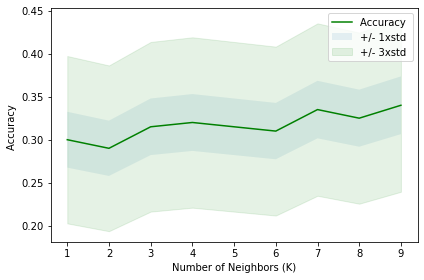

In [21]:
# Plotting the model accuracy for different numbers of neighbors
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc -1 *std_acc, mean_acc+ 1*std_acc, alpha = 0.10)
plt.fill_between(range(1, ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()

In [22]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# Decision Trees

## Objective

*   Develop a classification model using Decision Tree Algorithm
    1. Learn about the dataset
    2. load the data
    3. Pre-process the data
    4. Setting up the Decision tree
    5. Modeling 
    6. Predicting with the model
    7. Evaluating the model
    8. Visualising.

**About the Data**

   * Imagine that you are a medical researcher compiling data for a study. 
   * You have collected data about a set of patients, all of whom suffered from the same illness. 
   * During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
   * Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. 
   * The features of this dataset are 
        `Age`, 
        `Sex`, 
        `Blood Pressure`, and 
        the `Cholesterol` of the patients, and 
   * the target is the drug that each patient responded to.

In [23]:
# Loading the data
df1 = pd.read_csv("drug200.csv")
df1.head()                 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [24]:
# Splitting the data into X = feature matrix and y = target
X = df1[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
y = df1["Drug"]
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

* Feature matrix contain categorical data, and out algorithm does not handle categorical variables
* Using SK learn Pre-processor to transform the categorical data into indicator variables that the algorithm can handle

In [25]:
from sklearn.preprocessing import LabelEncoder

# tranform sex categorical data
cat_sex = LabelEncoder()
cat_sex.fit(["F", "M"])
X[:, 1] = cat_sex.transform(X[:, 1])


# transform BP categorical data
cat_BP = LabelEncoder()
cat_BP.fit(["LOW", "NORMAL", "HIGH"])
X[:, 2] = cat_BP.transform(X[:, 2])

# transform Cholesterol categorical data
cat_Chol = LabelEncoder()
cat_Chol.fit(["NORMAL", "HIGH"])
X[:, 3] = cat_Chol.transform(X[:, 3])



In [26]:
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [27]:
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

**Splitting the X and y into trainset and testset**
* 70% for the train set
* 30% for the test set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

**Training the model**

In [29]:
# importing DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
drug_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# fitting the model with the trainset
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Making Prediction on the test set**

In [30]:
# Making predictions on the testset
y_pred = drug_tree.predict(X_test)

**Evaluating the model**

In [31]:
# importing the evaluation metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9833333333333333

**Visualising the decision tree**

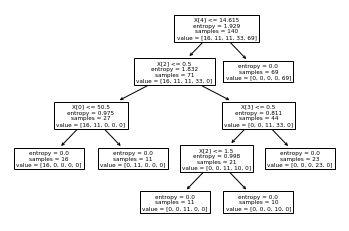

In [32]:
# import tree_plot to plot the model tree
from sklearn.tree import plot_tree
plot_tree(drug_tree);

# Regression Trees

## Objective

*   Develop a classification model using Decision Tree Algorithm
    1. Learn about the dataset
    2. load the data
    3. Pre-process the data
    4. Setting up the Decision tree
    5. Modeling 
    6. Predicting with the model
    7. Evaluating the model
    8. Visualising.

**About the dataset**

* Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. 
* You have collected information about various areas of Boston 
* created a model that can predict the median price of houses for that area so it can be used to make offers.

* **Features of the dataset**

  1. CRIM: Crime per capita

  2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

  3. INDUS: Proportion of non-retail business acres per town

  4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  5. NOX: Nitric oxides concentration (parts per 10 million)

  6. RM: Average number of rooms per dwelling

  7. AGE: Proportion of owner-occupied units built prior to 1940

  8. DIS: Weighted distances to ﬁve Boston employment centers

  9. RAD: Index of accessibility to radial highways

  10. TAX: Full-value property-tax rate per $10,000

  11. PTRAIO: Pupil-teacher ratio by town

  12. LSTAT: Percent lower status of the population
  
  13. MEDV Median value of owner-occupied homes in $1000's

In [38]:
estate_df = pd.read_csv("./data/real_estate_data.csv")
estate_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [39]:
estate_df.shape

(506, 13)

In [40]:
estate_df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

**Data Pre-processing**

data contains missing values

In [41]:
# Drop row with missing values and mute the estate_df setting inplace = True
estate_df.dropna(inplace = True)

In [42]:
# re-check the data
estate_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

**Splitting data into feature set `X` and target set `y`**

In [43]:
X = estate_df.drop("MEDV", axis = 1)
y= estate_df["MEDV"]

In [44]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [45]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

**Splitting data into `train` and `test` set**

* 80% for train set
* 20% for test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

**Training the Regression Tree model**

In [50]:
# Importing Regression tree model using squared_error criterion
from sklearn.tree import DecisionTreeRegressor

# intitialising the model
rgt = DecisionTreeRegressor(criterion="squared_error")

# fitting model on the train set
rgt.fit(X_train, y_train)


DecisionTreeRegressor()

**Evaluating the model**

In [52]:
#using Regression object score method
rgt.score(X_test, y_test)

0.7243551157263429

In [53]:
# find te average error
pred = rgt.predict(X_test)

avg_err = (pred - y_test).abs().mean()*1000
avg_err

3287.3417721518986

In [54]:
rgt1 = DecisionTreeRegressor(criterion="absolute_error")
rgt1.fit(X_train, y_train)

print(f"R^2_score: {rgt.score(X_test, y_test)}")
pred1 = rgt.predict(X_test)
print(f"average_error: ${(pred1 - y_test).abs().mean()*1000} ")

R^2_score: 0.7243551157263429
average_error: $3287.3417721518986 


# Logistic Regression

## Objectives

* Use scikit Logistic Regression to classify
* About the dataset
* Data preprocessing and Selection
* Modeling (Logistic Regression)
* Evaluate the model
* Understand confusion matrix

**About the data**

* We will use a telecommunications dataset for predicting customer churn. 
* This is a historical customer dataset where each row represents one customer. 
* The data is relatively easy to understand, and you may uncover insights you can use immediately. 
* Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
* This data set provides information to help you predict what behavior will help you to retain customers. 
* You can analyze all relevant customer data and develop focused customer retention programs.

**The dataset includes information about:**

* Customers who left within the last month – the column is called `Churn`
* Services that each customer has signed up for – `phone`, `multiple lines`, `internet`, `online security`, `online backup`, `device protection`, `tech support`, and `streaming TV` and `movies`
* Customer account information – how long they had been a `customer`, `contract`, `payment method`, `paperless billing`, `monthly charges`, and `total charges`
* Demographic info about customers – `gender`, `age range`, and if they have `partners and dependents`

In [55]:
df2 = pd.read_csv("ChurnData.csv")
df2.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [56]:
df2.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [57]:
# selecting some features for the modeling
df2= df2[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
        'callcard', 'wireless', 'churn']]

In [58]:
df2["churn"].dtype

dtype('float64')

In [59]:
# converting the churn data type to int
df2["churn"] = df2["churn"].astype("int")
df2.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


**Split te data into X and y**

In [60]:
X = df2[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values

In [61]:
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [62]:
y = df2[["churn"]].values

In [63]:
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

**Normalise our data set**

In [64]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

**Splitting X and y into trainset and testset**
* 80% training set
* 20% testing set

In [65]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.2, random_state = 4)

**Training the model**

In [66]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C = 0.01, solver="liblinear")
logr.fit(X_trainset, y_trainset)

C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

**Predicting on the model**

In [67]:
y_prediction = logr.predict(X_testset)

In [68]:
y_prob = logr.predict_proba(X_testset)

**Evaluating logistic model on test set**

In [69]:
# Using Jaccard index: size of intersection divided by size of Union of two label sets
from sklearn.metrics import jaccard_score
jaccard_score(y_testset, y_prediction, pos_label = 0)

0.7058823529411765

In [70]:
# Confusion metrix : gives ideal of how confussed our model is
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, y_prediction, labels = [1, 0])

array([[ 6,  9],
       [ 1, 24]], dtype=int64)

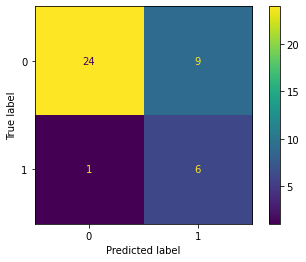

In [71]:
# Plotting the confusion_metrics
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_prediction, y_testset);

**The first row is for customers whose actual churn value in the test set is 0.**
* Total of 40 customers, the churn value of 33 of them is 0.
* Out of 33 cases, the classifier correctly predicted 24 of them as 0, and wrongly predicted 9 of them as 1, considerably good.

**The second row is for customers whose actual churn value in the test set is 1**
* Total of 40 customers, the churn value of 7 of them is 1
* out of 7 cases, the classifier correctly predicted 6 of them as 1, and wrongly predicted 1 of them as 0, also considerably good

**In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.**


In [72]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_testset, y_prediction))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

*   **F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [73]:
# Using log loss
from sklearn.metrics import log_loss
log_loss(y_testset, y_prob)

0.6017092478101187

C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

0.5855605976027394
Jaccard score: 0.26666666666666666
Confusion Matrix: [[25  0]
 [11  4]]


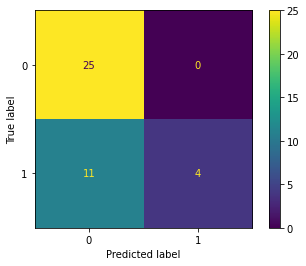

In [74]:
# With different solver and Regularization values
logr1 = LogisticRegression(C = 0.05, solver="lbfgs")
logr1.fit(X_trainset, y_trainset)

# Make predicton
y_prediction = logr1.predict(X_testset)
y_proba = logr1.predict_proba(X_testset)

# Evalute model
jc = jaccard_score(y_testset, y_prediction)
cfm = confusion_matrix(y_testset, y_prediction)
print(classification_report(y_testset, y_prediction))
print(log_loss(y_testset, y_proba))
print(f"Jaccard score: {jc}")
print(f"Confusion Matrix: {cfm}")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_testset, y_prediction);

# SVM (Support Vector Machines)

## Objectives

 *   Use scikit-learn to Support Vector Machine to classify
 *   build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.
     1. Load the Cancer data
     2. Modeling
     3. Evaluation


   **SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.** 
   **A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.** 
   **Following this, characteristics of new data can be used to predict the group to which a new record should belong.**


### **About the data**

The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |


In [75]:
# load data
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


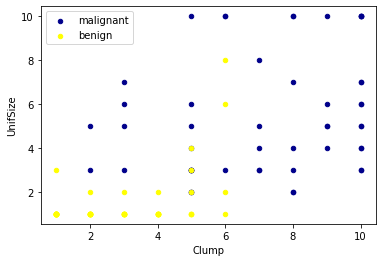

In [76]:
# Distribution base on clump thickness
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);


In [77]:
cell_df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [79]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

**There are non numeric data in BareNuc column from the value count and dtypes**

In [83]:
# drop non-numeric rows
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors = "coerce").notnull()]

# convert the column to int
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int64")

In [84]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

**Split data into Feature set `X` and target set `y`**

In [104]:
X = np.asarray(cell_df[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]])

y = np.asarray(cell_df["Class"].astype(int))

**Split `Feature` and `target` set into:**
  * **trainset 80%** and 
  * **testset 20%**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [108]:
y_train[0:5]

array([4, 2, 2, 4, 4])

In [100]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [103]:
cell_df["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

**Trian the SVM model**

* Mapping data into a higher dimensional space is called kernelling. 
* The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. 

We usually choose different functions in turn and compare the results.


In [109]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)

SVC()

**Making prediction**

In [110]:
pred_svc = clf.predict(X_test)

**Evaluate the model**

In [112]:
# Using classification report
from sklearn.metrics import classification_report
print(classification_report(pred_svc, y_test))

              precision    recall  f1-score   support

           2       0.94      1.00      0.97        85
           4       1.00      0.90      0.95        52

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.97      0.96      0.96       137



[[85  0]
 [ 5 47]]


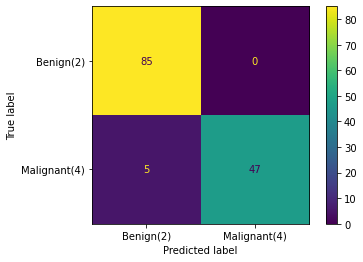

In [117]:
# Using Confusion metrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(pred_svc, y_test))
ConfusionMatrixDisplay.from_predictions(pred_svc, y_test, display_labels=("Benign(2)", "Malignant(4)"))

In [120]:
# using Jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(pred_svc, y_test, pos_label = 4)

0.9038461538461539